In [2]:
import tensorflow as tf


In [4]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

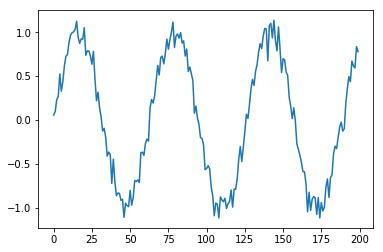

In [53]:
series=np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show();

In [54]:
T=10
X=[]
Y=[]
for t in range(len(series)-T):
    x=series[t:t+T]
    X.append(x)
    y=series[t+T]
    Y.append(y)
print(X[2],Y[1])    
X=np.array(X).reshape(-1,T)
Y=np.array(Y)
N=len(X)

[0.22967859 0.26868052 0.52466952 0.32820636 0.43499916 0.61669691
 0.72612732 0.74521057 0.88072206 0.96482962] 0.9648296178468763


In [55]:
i=Input(shape=(T,))
x=Dense(1)(i)
model=Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1),)
r=model.fit(X[:-N//2],Y[:-N//2],epochs=80,validation_data=(X[N//2:],Y[N//2:]),)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 3ms/sample - loss: 0.2142 - val_loss: 0.0928
Epoch 2/80
95/95 [==============================] - 0s 65us/sample - loss: 0.0876 - val_loss: 0.0396
Epoch 3/80
95/95 [==============================] - 0s 83us/sample - loss: 0.0320 - val_loss: 0.0736
Epoch 4/80
95/95 [==============================] - 0s 96us/sample - loss: 0.0378 - val_loss: 0.0686
Epoch 5/80
95/95 [==============================] - 0s 119us/sample - loss: 0.0606 - val_loss: 0.0509
Epoch 6/80
95/95 [==============================] - 0s 111us/sample - loss: 0.0449 - val_loss: 0.0549
Epoch 7/80
95/95 [==============================] - 0s 101us/sample - loss: 0.0299 - val_loss: 0.0456
Epoch 8/80
95/95 [==============================] - 0s 113us/sample - loss: 0.0304 - val_loss: 0.0288
Epoch 9/80
95/95 [==============================] - 0s 79us/sample - loss: 0.0262 - val_loss: 0.0344
Epoch 10/80
95/95 [=========================

95/95 [==============================] - 0s 98us/sample - loss: 0.0117 - val_loss: 0.0193


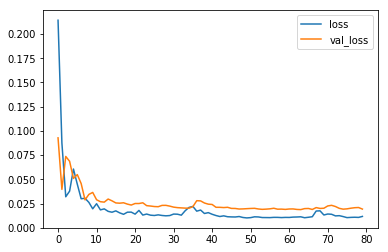

In [56]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [57]:
validation_target=Y[N//2:]
validation_pred=[]
last_x=X[N//2]
print(last_x)
while len(validation_target)>len(validation_pred):
    print(last_x.reshape(1,-1)[0][0])
    p=model.predict(last_x.reshape(1,-1))[0][0]
    validation_pred.append(p)
    last_x=np.roll(last_x,-1)
    last_x[-1]=p
    print(last_x)

[-0.04933915 -0.20058501 -0.20926398 -0.28517671 -0.56517098 -0.55180374
 -0.51973143 -0.55553903 -0.76063894 -0.86260137]
-0.04933915280273031
[-0.20058501 -0.20926398 -0.28517671 -0.56517098 -0.55180374 -0.51973143
 -0.55553903 -0.76063894 -0.86260137 -0.80662638]
-0.20058500803192578
[-0.20926398 -0.28517671 -0.56517098 -0.55180374 -0.51973143 -0.55553903
 -0.76063894 -0.86260137 -0.80662638 -0.89584196]
-0.20926397707730876
[-0.28517671 -0.56517098 -0.55180374 -0.51973143 -0.55553903 -0.76063894
 -0.86260137 -0.80662638 -0.89584196 -0.94334114]
-0.2851767108909654
[-0.56517098 -0.55180374 -0.51973143 -0.55553903 -0.76063894 -0.86260137
 -0.80662638 -0.89584196 -0.94334114 -0.91013002]
-0.5651709838099599
[-0.55180374 -0.51973143 -0.55553903 -0.76063894 -0.86260137 -0.80662638
 -0.89584196 -0.94334114 -0.91013002 -0.9738875 ]
-0.5518037412299465
[-0.51973143 -0.55553903 -0.76063894 -0.86260137 -0.80662638 -0.89584196
 -0.94334114 -0.91013002 -0.9738875  -1.03983283]
-0.5197314268274

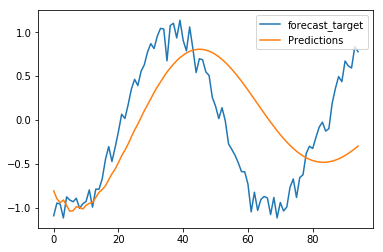

In [58]:
plt.plot(validation_target,label='forecast_target')
plt.plot(validation_pred,label='Predictions')
plt.legend()